In [1]:
import os
import json

In [2]:
# # 获取tr值
# _params = {}

# def get_by_tr(tr):
#     data = _params.get(tr)
#     if not data:
#         data = []
#         _params[tr] = data
#     return data

In [58]:
# 提取补偿
def extrace_data(jsonFile, DataArray, benchmark=36.6):
    records = json.load(open(jsonFile, 'r'))

#     trSum = 0.0
#     for r in records:
#         trSum += r['tr']
#     tr = round((trSum / len(records)),2)

#     offsetArray = get_by_tr(tr)
#     print(offsetArray)

    for r in records:
        data = {
            'originalTemp': r['originalValue'],
            'distance': round(r['distance'],2),
            'tr': round(r['tr'],2),
            'face_area': r['faceInfo']['height']*r['faceInfo']['width'],
#             'offset': float('%.2f' % (benchmark - r['originalValue']))
            'offset': round((benchmark - r['originalValue']),2)
        }
        DataArray.append(data)
    return DataArray

In [59]:
# 读取训练数据
def read_training_data():
    file_list = os.listdir("TrainingData")
    DataArray = []
    for f in file_list:
        benchmark = int(f[-8:-5]) / 10.0
#         print(benchmark)
        DataArray = extrace_data("TrainingData/" + f, DataArray, benchmark)
    return DataArray

In [5]:
# # 从字典中取出数据
# def get_list_from_dict(dict, key):
#     data = dict.get(key)
#     if not data:
#         data = []
#         dict[key] = data
#     return data

In [6]:
# def marge(offsetArray):
#     groups = {}
#     for offset in offsetArray:
#         group = get_list_from_dict(groups, offset['distance'])
#         group.append(offset)

#     distance_list = groups.keys()
#     distance_list = sorted(distance_list)

#     values = {}
#     for distance in distance_list:
#         group = groups[distance]
#         sum = 0.0
#         for o in group:
#             sum += o['offset']
#         values[distance] = sum / len(group)

#     return values

In [60]:
DataArray = read_training_data()
print(DataArray)
print(DataArray[0].keys())
# print(_params.keys())

[{'originalTemp': 35.07, 'distance': 25.45, 'tr': 17.58, 'face_area': 159045, 'offset': 1.63}, {'originalTemp': 35.02, 'distance': 25.44, 'tr': 17.58, 'face_area': 156294, 'offset': 1.68}, {'originalTemp': 35.36, 'distance': 25.61, 'tr': 17.58, 'face_area': 150864, 'offset': 1.34}, {'originalTemp': 35.25, 'distance': 25.61, 'tr': 17.58, 'face_area': 158355, 'offset': 1.45}, {'originalTemp': 35.17, 'distance': 25.29, 'tr': 17.58, 'face_area': 151762, 'offset': 1.53}, {'originalTemp': 35.03, 'distance': 25.93, 'tr': 17.59, 'face_area': 151536, 'offset': 1.67}, {'originalTemp': 35.15, 'distance': 26.25, 'tr': 17.59, 'face_area': 147408, 'offset': 1.55}, {'originalTemp': 35.43, 'distance': 26.41, 'tr': 17.59, 'face_area': 144210, 'offset': 1.27}, {'originalTemp': 35.19, 'distance': 26.56, 'tr': 17.59, 'face_area': 144102, 'offset': 1.51}, {'originalTemp': 35.2, 'distance': 26.75, 'tr': 17.59, 'face_area': 140616, 'offset': 1.5}, {'originalTemp': 35.0, 'distance': 27.45, 'tr': 17.59, 'face_

In [27]:
# final_array = {}
# for k, v in _params.items():
#     values = marge(v)
#     final_array[k] = values

# json.dump(final_array, open('params.json', 'w'))
# print(len(final_array))

5


In [61]:
import pandas as pd
df = pd.DataFrame(DataArray)
df

,distance,face_area,offset,originalTemp,tr
0,25.45,159045,1.63,35.07,17.58
1,25.44,156294,1.68,35.02,17.58
2,25.61,150864,1.34,35.36,17.58
3,25.61,158355,1.45,35.25,17.58
4,25.29,151762,1.53,35.17,17.58
5,25.93,151536,1.67,35.03,17.59
6,26.25,147408,1.55,35.15,17.59
7,26.41,144210,1.27,35.43,17.59
8,26.56,144102,1.51,35.19,17.59
9,26.75,140616,1.50,35.20,17.59


In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

names = ['distance', 'face_area', 'offset', 'originalTemp', 'tr']

In [67]:
#求解相关系数
correlations = df.corr()

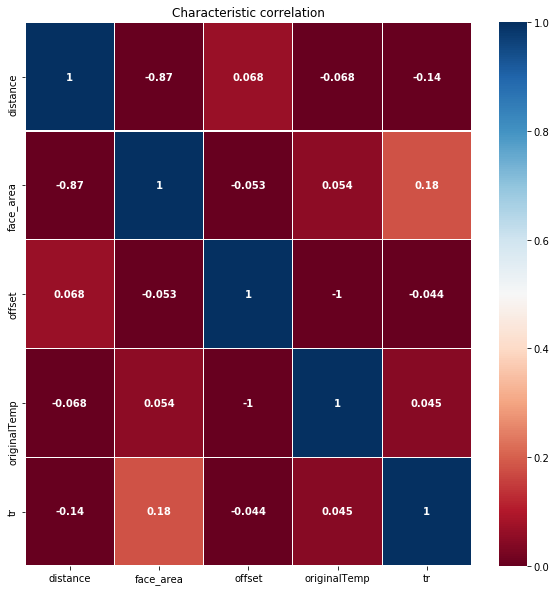

In [68]:
# plot correlation matrix 
fig = plt.figure(figsize=(10,10)) #图片大小为20*20
ax = fig.add_subplot() 

#热力图参数设置（相关系数矩阵，颜色，每个值间隔等）
ax = sns.heatmap(correlations,cmap=plt.cm.RdBu, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})
num = len(names)

#ticks = numpy.arange(0,3,1) #生成0-3，步长为1 
plt.xticks(np.arange(num)+0.5,names) #横坐标标注点
plt.yticks(np.arange(num)+0.5,names) #纵坐标标注点
#ax.set_xticks(ticks) #生成刻度 
#ax.set_yticks(ticks)
#ax.set_xticklabels(names) #生成x轴标签 
#ax.set_yticklabels(names)
ax.set_title('Characteristic correlation')#标题设置
plt.savefig('cluster.tif',dpi=300)
plt.show()